In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 0)

In [24]:
members = pd.read_csv('members.csv')
peaks = pd.read_csv('peaks.csv')
expeditions = pd.read_csv('expeditions.csv')

In [25]:
peaks.head()

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101


Text(0, 0.5, 'Name of Peak')

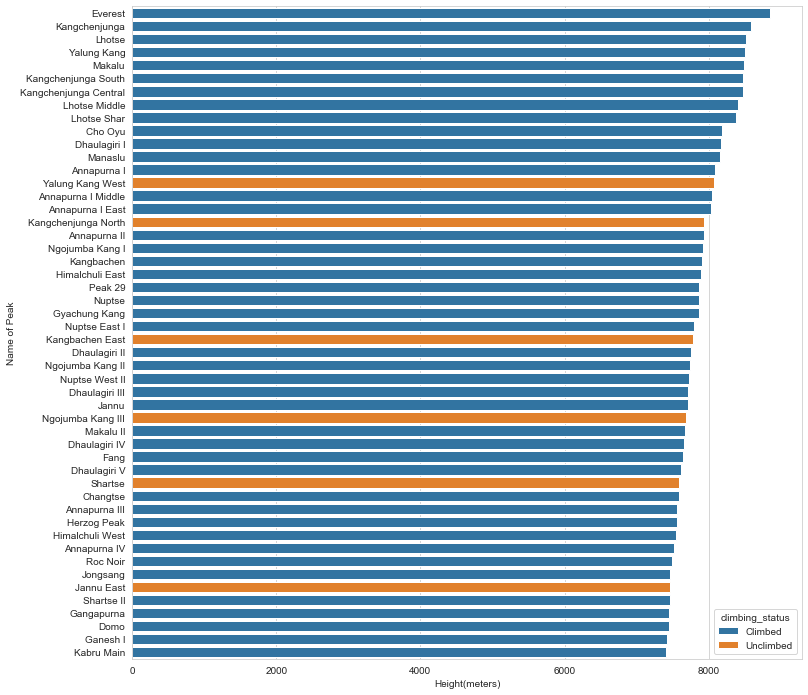

In [21]:
tallest_peaks = peaks.sort_values('height_metres', ascending=False).head(50)

plt.figure(figsize=(12,12))
sns.barplot(x=tallest_peaks.height_metres, y=tallest_peaks.peak_name, hue=tallest_peaks.climbing_status,
            data=tallest_peaks, dodge=False)
plt.xlabel('Height(meters)')
plt.ylabel('Name of Peak')

In [27]:
expeditions.head(10)

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,True,NaN
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,10,0,0,0,False,NaN
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,6,0,8,0,False,NaN
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,2,0,0,0,False,NaN
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,3,0,0,0,False,NaN
5,ANN280101,ANN2,Annapurna II,1980,Spring,1980-03-25,1980-04-24,1980-05-01,Accident (death or serious injury),7000.0,6,1,2,0,False,NaN
6,ANN280102,ANN2,Annapurna II,1980,Spring,1980-04-09,1980-05-08,NaN,Accident (death or serious injury),7250.0,7,0,2,0,False,NaN
7,ANN281302,ANN2,Annapurna II,1981,Autumn,1981-09-04,1981-09-23,NaN,"Bad weather (storms, high winds)",6400.0,19,0,0,0,False,NaN
8,ANN281301,ANN2,Annapurna II,1981,Autumn,1981-09-04,1981-10-11,1981-10-17,Accident (death or serious injury),7400.0,9,1,3,0,False,NaN
9,ANN282301,ANN2,Annapurna II,1982,Autumn,1982-09-14,1982-10-04,1982-10-08,"Bad weather (storms, high winds)",7350.0,5,0,0,0,False,NaN


In [42]:
exp_by_peak = expeditions.groupby('peak_name').agg(n_climbs=('peak_id', 'count'),
                                     first_climb=('year', 'min'), 
                                     n_climbers=('members', 'sum'),
                                     n_deaths=('member_deaths', 'sum'),
                                     n_hired_staffs=('hired_staff', 'sum'),
                                     n_hired_staff_deaths=('hired_staff_deaths', 'sum')).sort_values('n_climbs', ascending=False)

In [45]:
exp_by_peak['pct_deaths'] = exp_by_peak.n_deaths / exp_by_peak.n_climbers
exp_by_peak['pct_hired_staff_deaths'] = exp_by_peak.n_hired_staff_deaths / exp_by_peak.n_hired_staffs

## Deadliest peaks in the Himalayas?

In [58]:
exp_by_peak[exp_by_peak['n_climbs'] >= 50].sort_values(['pct_deaths', 'n_climbers'], ascending=False).head(20)

,n_climbs,first_climb,n_climbers,n_deaths,n_hired_staffs,n_hired_staff_deaths,pct_deaths,pct_hired_staff_deaths
peak_name,,,,,,,,
Annapurna I,243,1950,1453,54,547,18,0.037164,0.032907
Kangchenjunga,184,1905,1162,34,635,17,0.029260,0.026772
Dhaulagiri I,383,1949,2242,63,780,22,0.028100,0.028205
Nuptse,64,1961,267,7,83,0,0.026217,0.000000
Jannu,52,1957,316,7,115,1,0.022152,0.008696
Pumori,265,1951,1615,33,316,9,0.020433,0.028481
Manaslu,632,1950,3434,69,1702,16,0.020093,0.009401
Makalu,356,1934,2026,30,865,18,0.014808,0.020809
Tilicho,86,1965,633,9,124,0,0.014218,0.000000


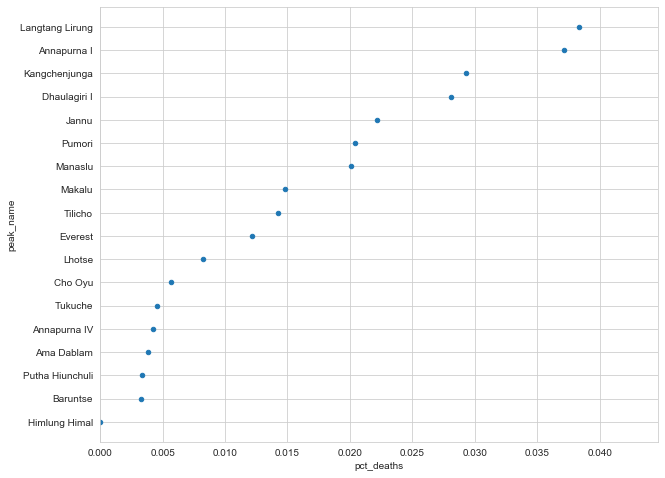

In [62]:
exp_by_peak[exp_by_peak['n_climbers'] >= 300].reset_index().sort_values('pct_deaths').plot(kind='scatter', x='pct_deaths',
                                                                                              y='peak_name', xlim=(0),
                                                                                           figsize=(10,8))